**Muhammad Aizar Yazid / 1103223097**

**Regression Second Hand Dataset**
1. Buat model Deep learning MLP (PyTorch and Tensorflow).
2. Gunakan Matriks Evaluasi (RMSE,MSE,RSquared)
3. Beri penjelasan untuk setiap persamaan matematika yang ada.


# Import

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize, StandardScaler, LabelEncoder
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

In [128]:
data = pd.read_csv('https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/02.%20Deep%20Learning/Dataset/secondhanddataset.csv')
data

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,633238,743850,5,125092,1,6,11,171,95,97,190744.0
996,997,599626,848195,4,83370,2,9,14,161,101,120,419748.0
997,998,646344,842733,7,86722,1,8,9,196,113,89,405871.0
998,999,535559,732439,2,140478,4,5,9,184,112,128,74398.0


In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   v.id           1000 non-null   int64  
 1   on road old    1000 non-null   int64  
 2   on road now    1000 non-null   int64  
 3   years          1000 non-null   int64  
 4   km             1000 non-null   int64  
 5   rating         1000 non-null   int64  
 6   condition      1000 non-null   int64  
 7   economy        1000 non-null   int64  
 8   top speed      1000 non-null   int64  
 9   hp             1000 non-null   int64  
 10  torque         1000 non-null   int64  
 11  current price  1000 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 93.9 KB


In [130]:
data.isnull().sum()


,0
v.id,0
on road old,0
on road now,0
years,0
km,0
rating,0
condition,0
economy,0
top speed,0
hp,0


In [131]:
data.duplicated().sum()

0

In [132]:
y = data['current price']
x = data.drop('current price', axis=1)

In [133]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [134]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [135]:
y_train = scaler.fit_transform(y_train.reshape(-1, 1))
y_test = scaler.transform(y_test.reshape(-1, 1))

In [136]:
#Stabilized model
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Neural Network

In [137]:
#MLP(Multi-Layer Perceptron)
class NeuNet(nn.Module):
  def __init__(self,input):
    super(NeuNet, self).__init__()
    self.fc1 = nn.Linear(input, 64)
    self.fc2 = nn.Linear(64, 32)
    self.fc3 = nn.Linear(32, 16)
    self.fc4 = nn.Linear(16, 1)
  def forward(self, x):
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = torch.relu(self.fc3(x))
    x = self.fc4(x)
    return x

model = NeuNet(x_train.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# PyTorch

In [138]:
x_train_torch = torch.tensor(x_train, dtype=torch.float32)
x_test_torch = torch.tensor(x_test, dtype=torch.float32)
y_train_torch = torch.tensor(y_train, dtype=torch.float32).view(-1, 1) # Use .values to get the underlying NumPy array
y_test_torch = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)   # Use .values to get the underlying NumPy array

In [139]:
epochs = 101
for epoch in range(epochs):
  model.train()
  optimizer.zero_grad()
  outputs = model(x_train_torch)
  loss = criterion(outputs, y_train_torch)
  loss.backward()
  optimizer.step()

  model.eval()
  with torch.no_grad():
      val_out = model(x_test_torch)
      val_loss = criterion(val_out, y_test_torch)

  if epoch % 10 == 0:
      print(f'{epoch}, T.Loss: {loss.item()}, V.Loss: {val_loss.item()}')

0, T.Loss: 1.03151535987854, V.Loss: 0.9556192755699158
10, T.Loss: 0.9141328930854797, V.Loss: 0.8434818983078003
20, T.Loss: 0.757814884185791, V.Loss: 0.6943781971931458
30, T.Loss: 0.5059171915054321, V.Loss: 0.45104461908340454
40, T.Loss: 0.21260465681552887, V.Loss: 0.18368107080459595
50, T.Loss: 0.05034741759300232, V.Loss: 0.05072147399187088
60, T.Loss: 0.04383465647697449, V.Loss: 0.042271003127098083
70, T.Loss: 0.018291592597961426, V.Loss: 0.022205645218491554
80, T.Loss: 0.014558983035385609, V.Loss: 0.01709546521306038
90, T.Loss: 0.010270531289279461, V.Loss: 0.01211891882121563
100, T.Loss: 0.008249515667557716, V.Loss: 0.011136242188513279


In [140]:
y_pred_torch = model(x_test_torch).detach().numpy()
rmse_torch = np.sqrt(mean_squared_error(y_test,y_pred_torch))
mse_torch = mean_squared_error(y_test, y_pred_torch)
r2_torch = r2_score(y_test, y_pred_torch)

print(f'RMSE:{rmse_torch}, MSE:{mse_torch}, R2:{r2_torch}')

RMSE:0.1055283929460924, MSE:0.011136241717784883, R2:0.9880818459410917


# TensorFlow

In [142]:
inputs = tf.keras.Input(shape=(x_train.shape[1],))
hid = tf.keras.layers.Dense(64, activation='relu')(inputs)
hid = tf.keras.layers.Dense(32, activation='relu')(hid)
hid = tf.keras.layers.Dense(16, activation='relu')(hid)
outputs = tf.keras.layers.Dense(1, activation='linear')(hid)

model = tf.keras.Model(inputs,outputs)

early = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model.compile(optimizer='adam', loss='mse')

history = model.fit(x_train, y_train, epochs=64, batch_size=32, validation_split=0.15, callbacks=[early])

Epoch 1/64
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.8926 - val_loss: 0.4463
Epoch 2/64
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3824 - val_loss: 0.1157
Epoch 3/64
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.1285 - val_loss: 0.0744
Epoch 4/64
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0735 - val_loss: 0.0523
Epoch 5/64
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0523 - val_loss: 0.0390
Epoch 6/64
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0321 - val_loss: 0.0325
Epoch 7/64
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0232 - val_loss: 0.0282
Epoch 8/64
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0184 - val_loss: 0.0251
Epoch 9/64
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0165 - val_loss: 0.0227
Epoch 10/64
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0136 - val_loss: 0.0219
Epoch 11/64
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0130 - val_loss: 0.0202
Epoch 12/64
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.010

In [148]:
y_pred_tensor = model.predict(x_test)
rmse_tensor = np.sqrt(mean_squared_error(y_test, y_pred_tf))
mse_tensor = mean_squared_error(y_test, y_pred_tf)
r2_tensor = r2_score(y_test, y_pred_tf)

print(f'RMSE: {rmse_tensor}, MSE: {mse_tensor}, R2: {r2_tensor}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
RMSE: 0.11395427243435644, MSE: 0.012985576206043528, R2: 0.9861026635655583


# Hasil Perbandingan

In [149]:
# prompt: Buat tabel hasil perbandingan dari matriks pytorch dan tensorflow

import pandas as pd

data = {'Metric': ['RMSE', 'MSE', 'R2'],
        'PyTorch': [rmse_torch, mse_torch, r2_torch],
        'TensorFlow': [rmse_tensor, mse_tensor, r2_tensor]}

df = pd.DataFrame(data)
df


,Metric,PyTorch,TensorFlow
0,RMSE,0.105528,0.113954
1,MSE,0.011136,0.012986
2,R2,0.988082,0.986103


# Penjelasan Persamaan Matematika

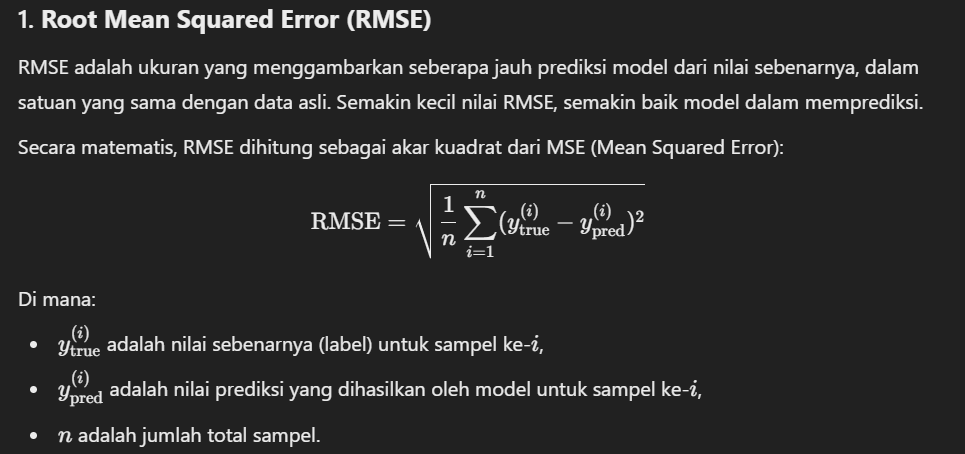

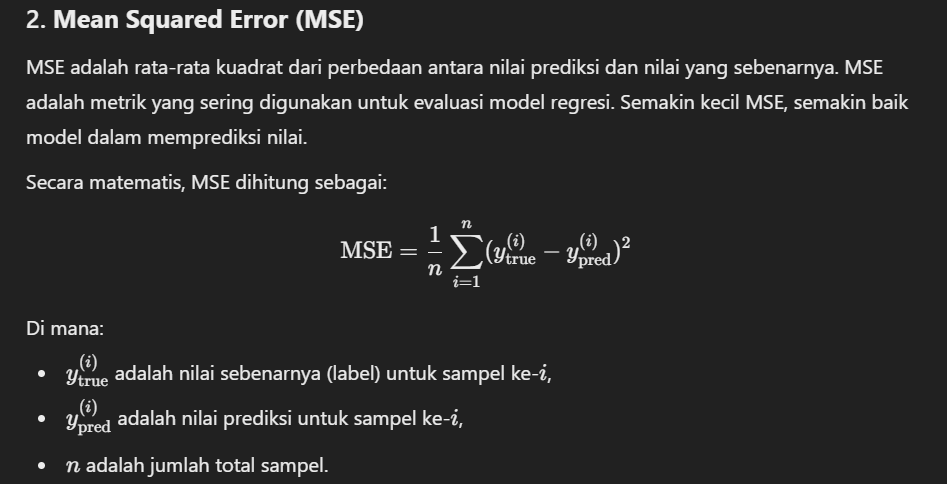

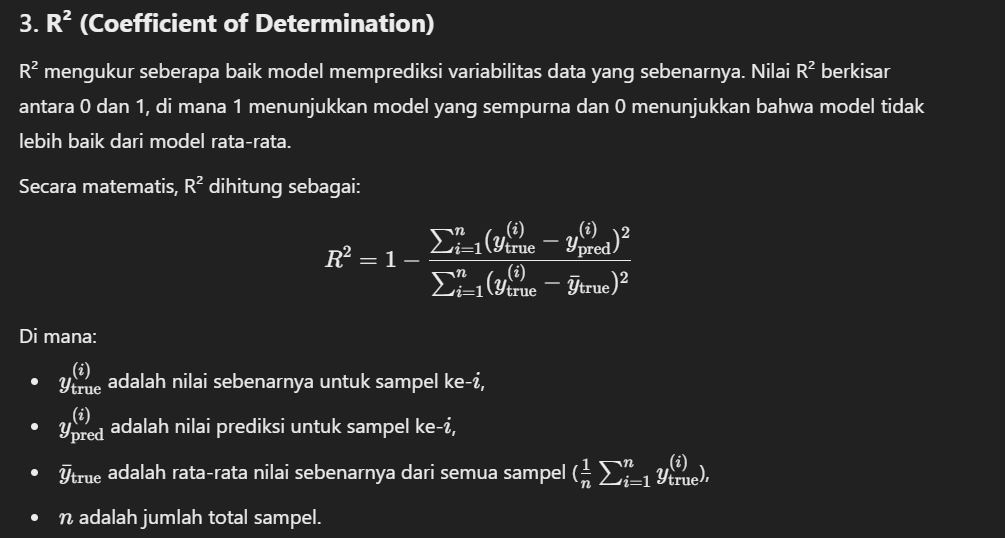